Jupyter Notebook elaborado pelo professor Clayton Kossoski. UTFPR - CEAUT - Setembro de 2023.

::

# APACHE SPARK

Apache Spark é um framework para criação de programas de processamento de dados distribuídos e aprendizado de máquina em grande escala.

PySpark é uma biblioteca (API) escrita em Python para executar aplicativos usando recursos do Apache Spark.

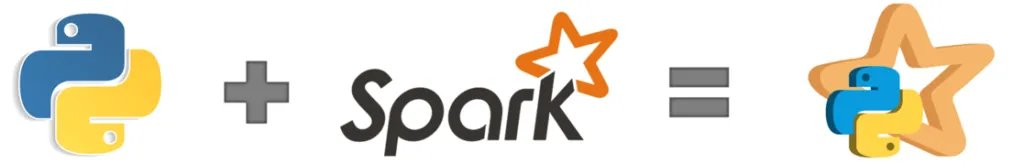

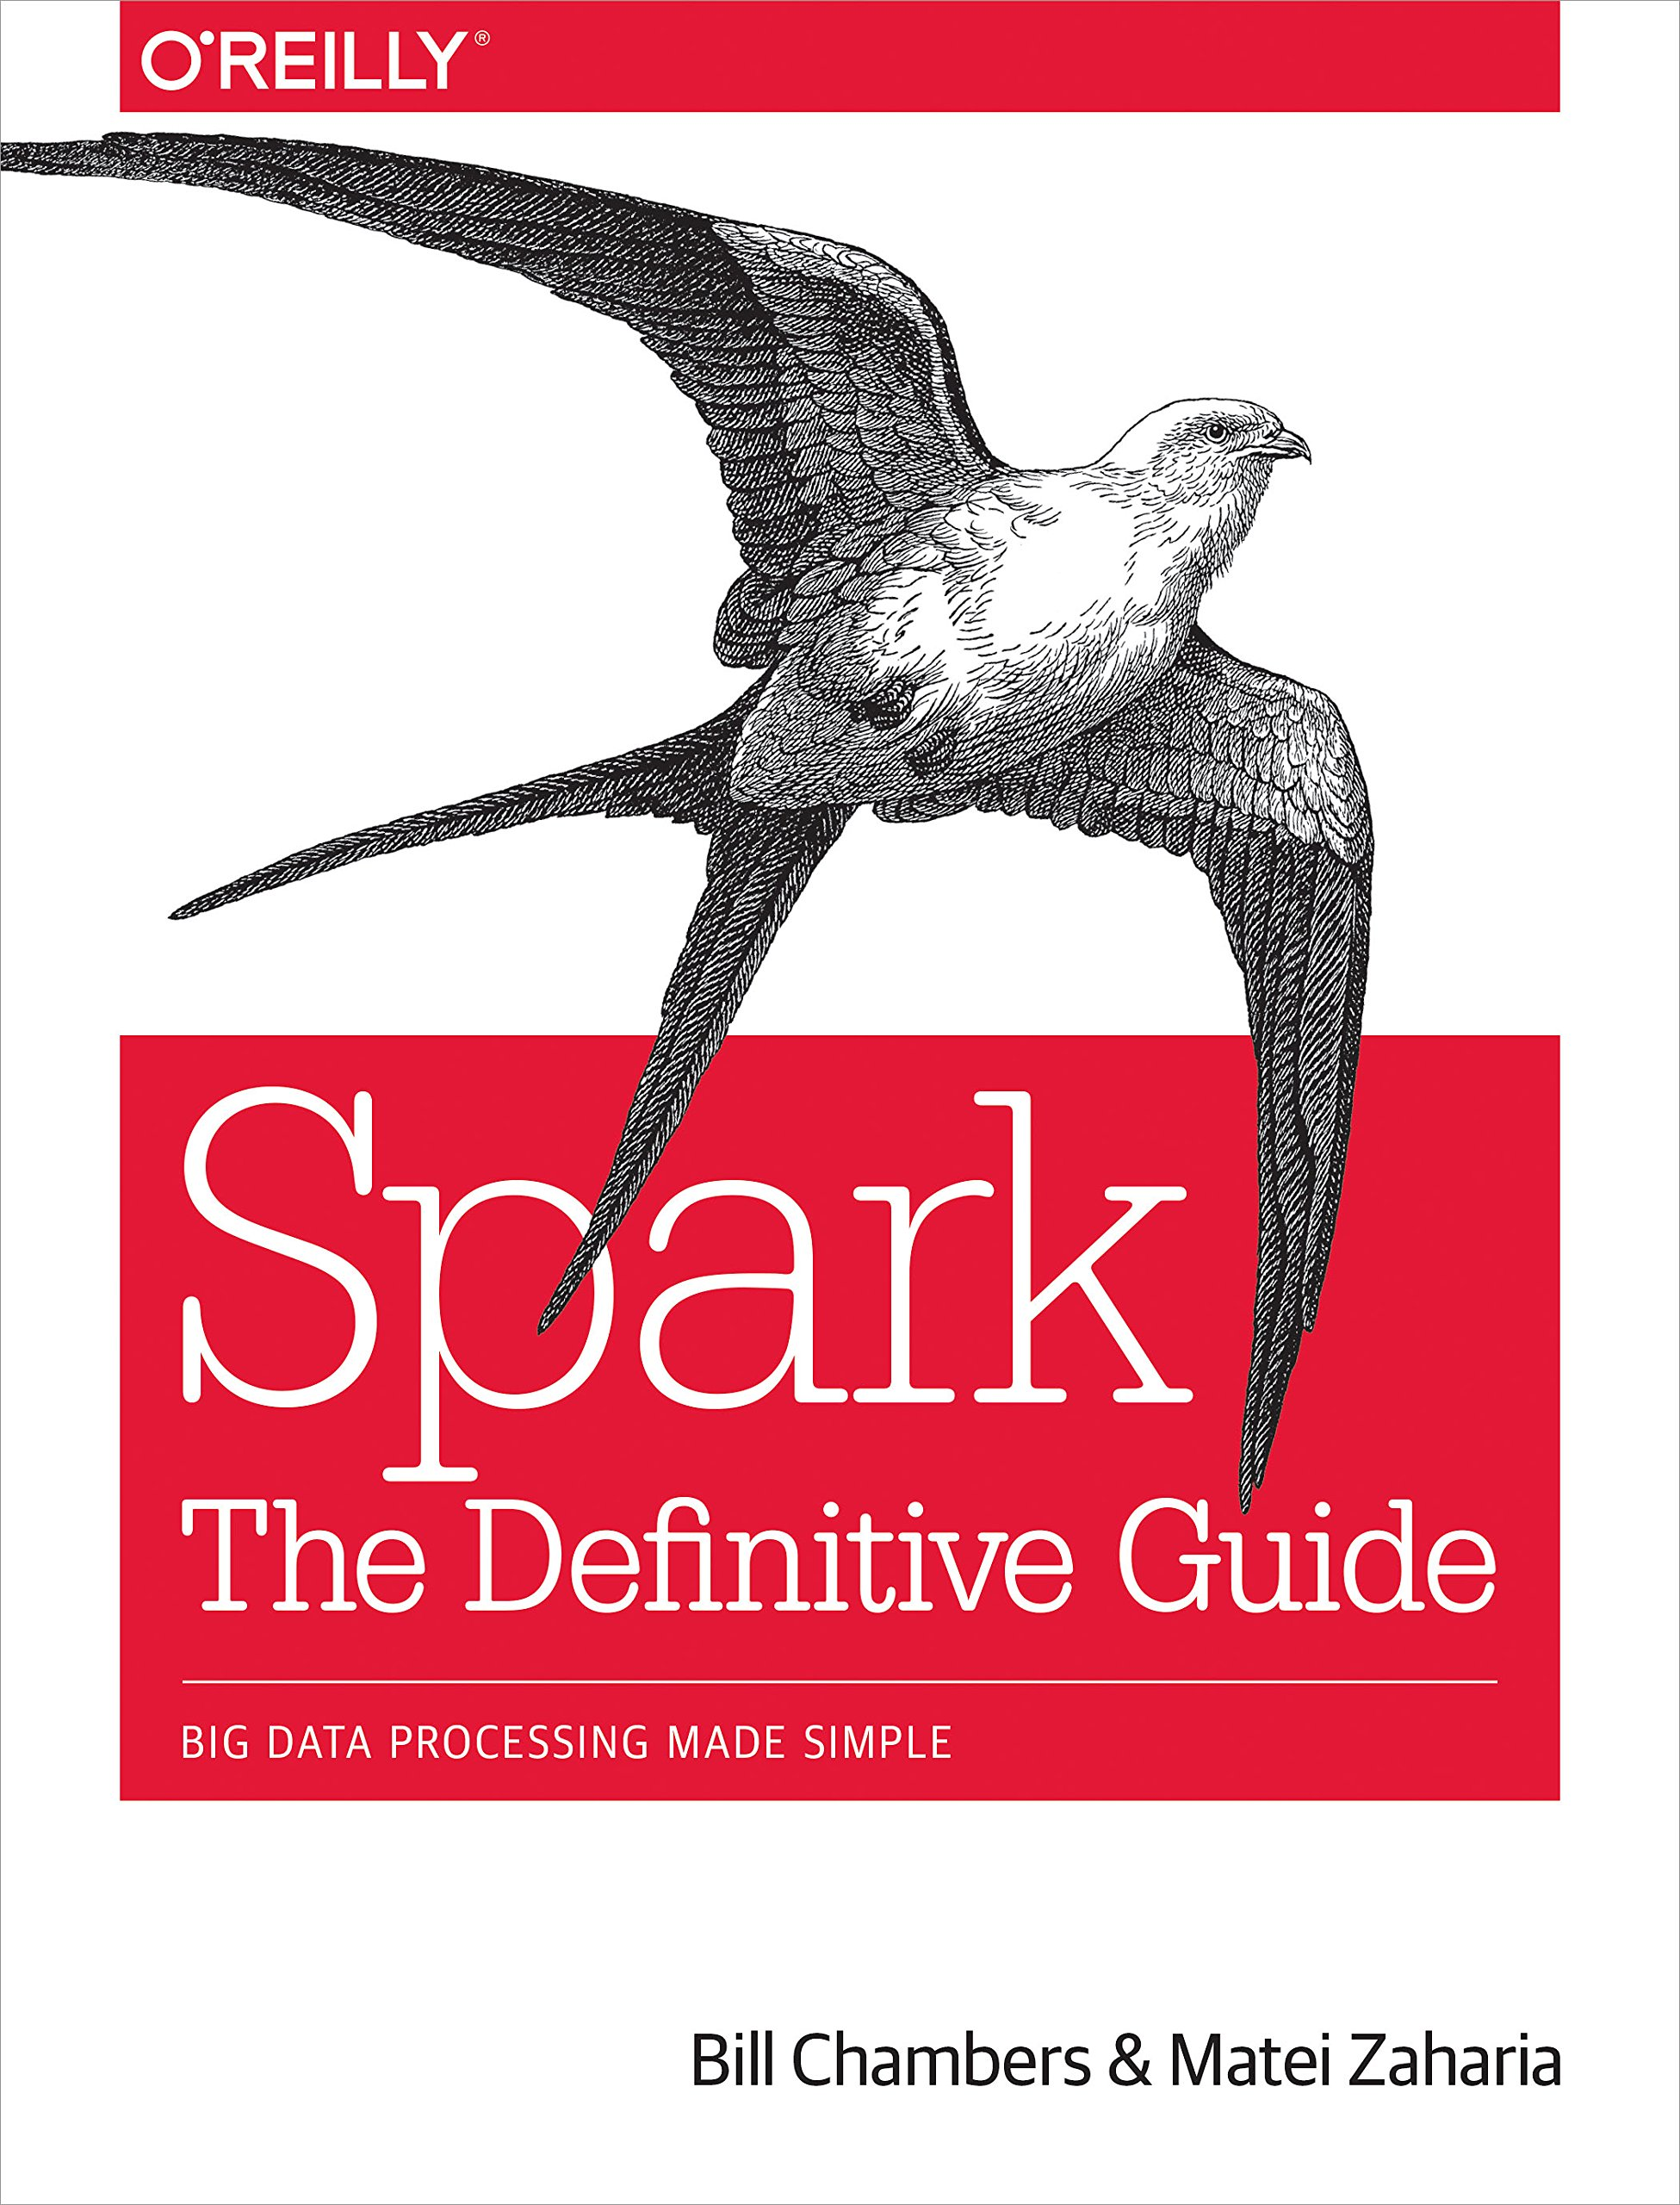

In [5]:
### Referências:

# https://spark.apache.org/docs/latest/api/python/pyspark.sql.html
# https://realpython.com/pyspark-intro/
# https://sparkbyexamples.com/pyspark-tutorial/
# https://spark.apache.org/docs/latest/quick-start.html

Spark inicialmente foi escrito em Scala e Java. Mais tarde, teve suporte de outras APIs como Pyspark, SparkR e SQL.

Py4J é uma biblioteca Java que está integrada ao PySpark e permite que o python faça interface dinâmica com objetos JVM. Portanto, para executar o PySpark, você também precisa que o Java seja instalado junto com o Python e o Apache Spark.

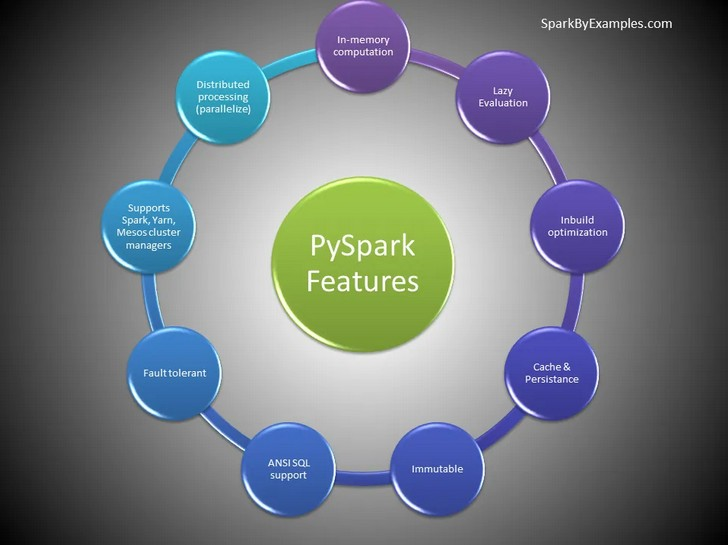

## Características do Pyspark



- Processamento em memória
- Processamento distribuído usando paralelização
- Pode ser usado com vários gerenciadores de cluster (Spark, Yarn, Mesos, Kubenetes)
- Tolerante a falhas
- Imutável
- Lazy load (avaliação preguiçosa)
- Cache e persistência
- Otimização embutida ao usar DataFrames
- Suporta ANSI SQL

## Vantagens do Spark

- O suporte a processamento em batches ou real time é nativo, inclusive no contexto de aprendizado de máquina, oferecendo bibliotecas similares às existentes no desenvolvimento python tradicional.
- Executa operações 100 vezes mais rápido do que o framework Hadoop.
- Agilidade para processamento de pipelines de ingestão de dados offline e/ou streaming.
- Permite trabalhar com dados do Hadoop HDFS, AWS S3, soquet, e muitos outros sistemas de arquivos e bancos de dados.
- Plotagem de gráficos e descrição de dados.

## Arquitetura

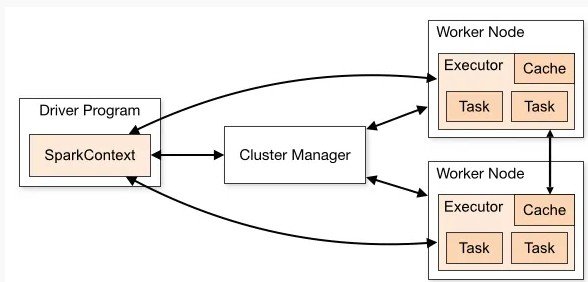

O Apache Spark trabalha em uma arquitetura master-slave onde o mestre é chamado de "Driver" e os escravos são chamados de "Workers". 

Ao executar uma aplicação, o Driver cria um contexto que é um ponto de entrada do programa e todas as operações (transformações e ações) são executadas nos workers, e os recursos são gerenciados pelo Cluster Manager.

## Tipos de gerenciadores de cluster

Atualmente, Spark oferece suporte aos seguintes gerenciadores de cluster:

- Standalone - gerenciador de cluster simples incluído no Spark que facilita a configuração de um cluster.
- Apache Mesos - gerenciador de cluster que também pode executar aplicativos Hadoop MapReduce e PySpark.
- Hadoop YARN - o gerenciador de recursos padrão do Hadoop 2. Ele é mais usado gerenciador de cluster.
- Kubernetes - um sistema de código aberto para automatizar a implantação, dimensionamento e gerenciamento de aplicativos em contêineres.

- local - não é realmente um gerenciador de cluster... mas usamos ele para executar o Spark localmente no laptop/computador.

## Pyspark módulos e pacotes

- PySpark RDD (pyspark.RDD) (https://spark.apache.org/docs/latest/rdd-programming-guide.html)
- PySpark DataFrame and SQL (pyspark.sql) (https://spark.apache.org/docs/latest/sql-getting-started.html)
- PySpark Streaming (pyspark.streaming)
- PySpark MLib (pyspark.ml, pyspark.mllib)
- PySpark GraphFrames (GraphFrames)
- PySpark Resource (pyspark.resource) It’s new in PySpark 3.0

- Terceiros (https://spark-packages.org/)

::

# INSTALAÇÃO E CONFIGURAÇÃO

### Java 8



sudo apt install openjdk-8-jdk



### Download do Spark (necessário para uso em cluster)



https://spark.apache.org/downloads.html

### Configurações e variáveis de ambiente

#### Atenção especial para informar o caminho completo do diretório spark-3.2.4-bin-hadoop3.2 na sua máquina

nano ~/.bashrc

export JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64/

export PATH=/usr/lib/x86_64-linux-gnu:$PATH

export LD_LIBRARY_PATH=/usr/lib/x86_64-linux-gnu:$LD_LIBRARY_PATH

export SPARK_HOME=/home/clayton/Desktop/spark-3.2.4-bin-hadoop3.2

export PATH=$PATH:$SPARK_HOME/bin:$SPARK_HOME/sbin

export PYSPARK_PYTHON=/usr/bin/python3.6

export PYSPARK_DRIVER_PYTHON=/usr/bin/python3.6

source ~/.bashrc

### Criação e configuração da virtualenv (venv, ambiente virtual python)

#### Funciona também com outras versões do Python afrente da 3.6

sudo apt-get install software-properties-common

sudo add-apt-repository ppa:deadsnakes/ppa

sudo apt-get update

sudo apt-get install python3.6

sudo apt-get install python3.6-dev python3.6-venv

python3.6 -m venv venv_36

### Ativação da venv e instalação dos pacotes

::

# TESTES BÁSICOS DE FUNCIONAMENTO

## Pyspark Shell

Com a venv_36 ativa, executar:

pyspark

para sair do Pyspark Shell, executar:
    
exit()

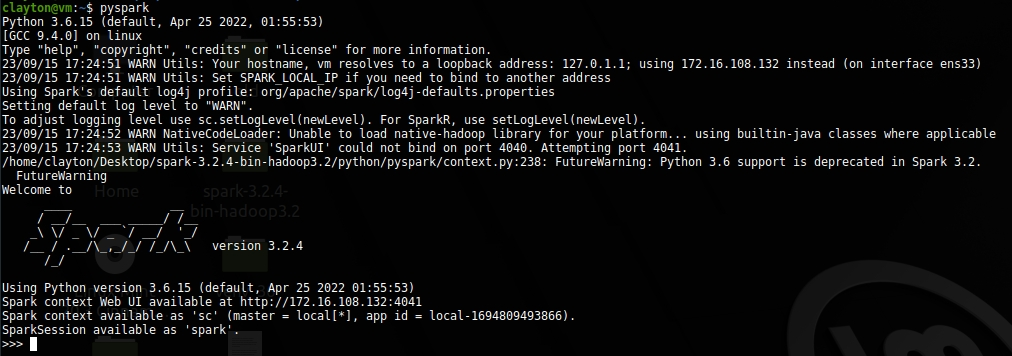

## Iniciar o Apache Spark em modo cluster

#### Iniciar o master e um worker. Atenção especial para a URL do master no seu computador.

Com as variáveis de ambiente configuradas, executar em um terminal qualquer:
    
$SPARK_HOME/sbin/start-master.sh

$SPARK_HOME/sbin/start-worker.sh spark://vm:7077

## Spark Web UI

Quando iniciado, o Apache Spark fornece um conjunto de UIs disponíveis em formato Web contendo guias para visualização de jobs, estágios, tarefas, armazenamento, ambiente, executores, e monitoração do status da aplicação.

http://localhost:8080

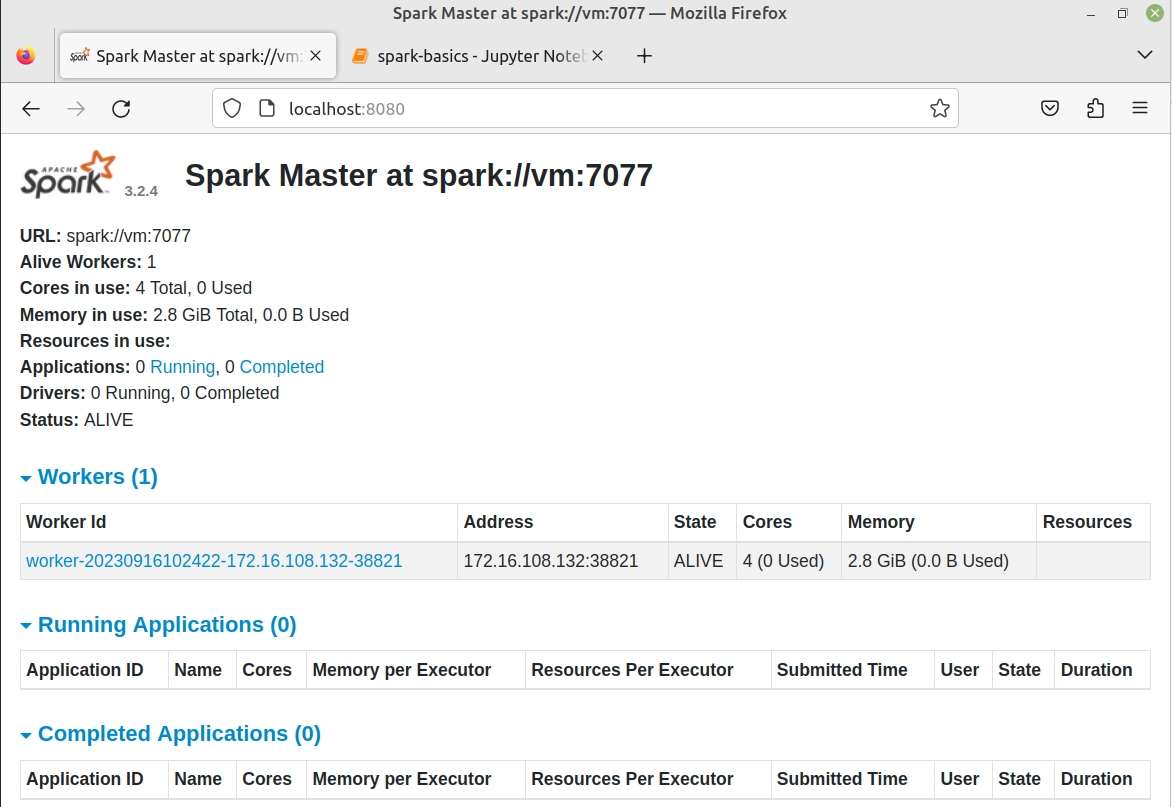

In [1]:
#from IPython.display import Image
#Image(filename='images/localhost8080.jpg') 

::

## Início do trabalho usando Pyspark e Jupyter

Com a venv_36 ativa, executar:

jupyter notebook

::

<h1 style='color:red; font-size:30px'> CRIAÇÃO DA SESSÃO E DO CONTEXTO SPARK </h1>

## Ponto de entrada mais importante!

### Iniciar o modo Pyspark Cluster (computação paralela - recomendado)

In [ ]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession

# Definição de quanta memória vai precisar dos Workers
SparkContext.setSystemProperty('spark.executor.memory', '2g')

# Atenção para a URL do master!
spark = SparkSession \
    .builder \
    .appName("Aula CEAUT - Pypark") \
    .config("spark.driver.cores", 2) \
    .master("spark://vm:7077") \
    .getOrCreate()


sc = spark.sparkContext

### Conferir se as instâncias de session e context estão ativas

In [ ]:
spark

In [ ]:
sc

::

<h1 style='color:blue; font-size:30px'> SPARK RDD – Resilient Distributed Dataset </h1>

O PySpark RDD (Resilient Distributed Dataset) é uma estrutura de dados fundamental do PySpark que consiste em uma coleção de objetos distribuídos de maneira imutável e tolerante a falhas. 
Após a criação de um RDD, não é possível alterá-lo. 
Cada conjunto de dados em RDD é dividido em partições lógicas, que podem ser calculadas em diferentes nós do cluster.

## Criação de um RDD

Para criar um RDD, é necessário ter uma SparkSession, que é um ponto de entrada para o aplicativo PySpark. SparkSession pode ser criado usando um método builder() ou newSession() do SparkSession.

É possível criar vários objetos SparkSession, mas apenas um SparkContext por JVM. Caso queira criar outro novo SparkContext, você deve parar o Sparkcontext existente (usando stop ()) antes de criar um novo.

In [ ]:
# Referências
# https://spark.apache.org/docs/latest/configuration.html

## Criar um RDD com parallelize

SparkContext tem várias funções para usar com RDDs. Por exemplo, seu método parallelize () é usado para criar um RDD a partir de uma lista.

In [ ]:
# Criar RDD com parallelize a partir de uma lista simples
# Esta lista poderia ser enorme, com vários TB de tamanho

dataList = [("Java", 1995), ("Python", 1992), ("Scala", 2001)]
rdd=sc.parallelize(dataList)

In [ ]:
# https://spark.apache.org/docs/latest/sql-data-sources-load-save-functions.html
# Criar RDD a partir de um arquivo de texto

rdd2 = sc.textFile("datasets/pedras.txt")

In [ ]:
# Mostrar 2 elementos deste rdd

rdd.take(2)

In [ ]:
# Contagem de elementos

rdd.count()

In [ ]:
# Primeiro elemento

rdd.first()

In [ ]:
rdd.max()

## Operações com RDD

In [ ]:
# Referências

# https://sparkbyexamples.com/pyspark/pyspark-rdd-transformations/
# https://sparkbyexamples.com/pyspark/pyspark-rdd-actions/

- Transformations: As Transformações retornam outro RDD. Não executam de fato, apenas preparam para a execução das Actions. Exemplos de Transformations: flatMap(), map(), reduceByKey(), filter(), sortByKey().

- Actions - As Ações realizam o processamento pesado. Exemplos de Action: take(), count(), collect(), first(), max(), reduce().

## Leitura de um arquivo de texto e carregamento no RDD

In [ ]:
rdd = spark.sparkContext.textFile("datasets/pedras.txt")

## Transformations

flatMap – a transformação flatMap() nivela o RDD após aplicar a função e retorna um novo RDD. No exemplo abaixo, primeiro ele divide cada registro por espaço em um RDD e finalmente o nivela. O RDD resultante consiste em uma única palavra em cada registro.

In [ ]:
# Transformation - flatMap

rdd2 = rdd.flatMap(lambda x: x.split(" "))


# ATENÇÃO! Collect é uma Action! Este exemplo apenas mostra o resultado da Transformation flatMap.
print(rdd2.collect())

map – a transformação map() é usada para aplicar quaisquer operações complexas, como adicionar uma coluna, atualizar uma coluna, etc., a saída das transformações do tipo map são realizadas em cada elemento.

Em nosso exemplo de contagem de palavras, estamos adicionando uma nova coluna com valor 1 para cada palavra, o resultado do RDD é PairRDDFunctions que contém pares chave-valor, palavra do tipo String como chave e 1 do tipo Int como valor.

In [ ]:
# Transformation - map

rdd3 = rdd2.map(lambda x: (x,1))

print(rdd3.collect())

reduceByKey() mescla os valores de cada chave com a função especificada. Em nosso exemplo, ele reduz a palavra string aplicando a função sum no valor. O resultado do nosso RDD contém palavras únicas e sua contagem.

In [ ]:
# Transformation - reduceByKey

rdd4 = rdd3.reduceByKey(lambda a,b: a+b)

print(rdd4.collect())

sortByKey – classifica os elementos RDD de acordo com a chave. Em nosso exemplo, primeiro convertemos RDD[(String,Int]) em RDD[(Int, String]) usando a transformação do mapa e aplicamos sortByKey que idealmente classifica um valor inteiro. E, finalmente, foreach com instruções println retorna todas as palavras em RDD e sua contagem como par de valores-chave

In [ ]:
# Transformation - map

rdd5 = rdd4.map(lambda x: (x[1],x[0])).sortByKey()

print(rdd5.collect())

filter – a transformação filter() é usada para filtrar os registros em um RDD. Em nosso exemplo, estamos filtrando todas as palavras que tenham a letra “p”.

In [ ]:
# Transformation - filter

rdd6 = rdd4.filter(lambda x : 'p' in x[0])

print(rdd6.collect())

## Actions

count() - retorna o número de linhas em um RDD

In [ ]:
# Action - count

print("Count : "+str(rdd3.count()))

first() - retorna o primeiro elemento de um RDD

In [ ]:
# Action - first

firstRec = rdd3.first()
print("First Record : "+str(firstRec[0]) + ","+ str(firstRec[1]))

max() - retorna o elemento máximo (último)

In [ ]:
# Action - max

datMax = rdd4.max()
print("Max Record : "+str(datMax[0]) + ","+ str(datMax[1]))

reduce() – Reduz os registros para um. Permite realizar o operações como soma ou contagem

In [ ]:
# Action - reduce

totalWordCount = rdd5.reduce(lambda a,b: (a[0]+b[0],a[1]))
print("dataReduce Record : "+str(totalWordCount[0]))

take() - retorna um registro especificado

In [ ]:
# Action - take

data3 = rdd5.take(3)
for f in data3:
    print("data3 Key:"+ str(f[0]) +", Value:"+f[1])

collect() – Retorna todos os dados do RDD como um array. Tenha cuidado ao usar esta ação ao trabalhar com RDD enormes com milhões e bilhões de dados, pois você pode ficar sem memória no driver.

In [ ]:
# Action - collect

data = rdd5.collect()
for f in data:
    print("Key:"+ str(f[0]) +", Value:"+f[1])

::

<h1 style='color:blue; font-size:30px'> SPARK SQL E SPARK DATAFRAME </h1>

DataFrame é uma coleção distribuída de dados organizados em colunas nomeadas. É conceitualmente equivalente a uma tabela em um banco de dados relacional ou um quadro de dados em R / Python, porém mais otimizado. Os DataFrames podem ser construídos a partir de uma ampla variedade de fontes, como arquivos de dados estruturados, tabelas no Hive, bancos de dados externos ou RDDs existentes.

Por ser integrado ao Spark, permite execução em cluster, tornando-o mais rápido que o Pandas (python) tradicional.

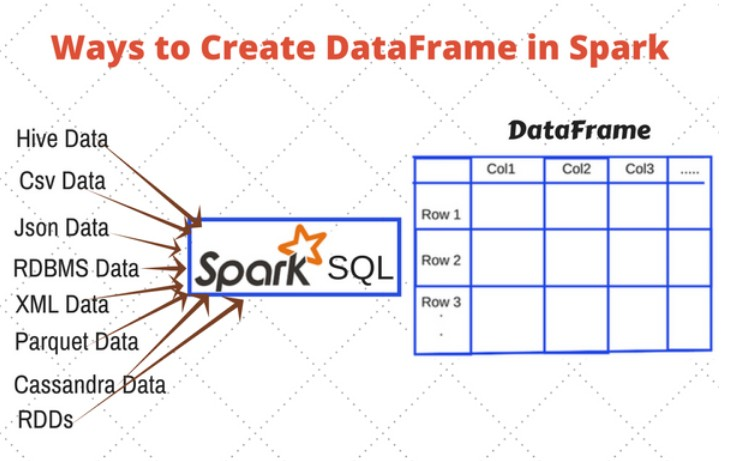

## Converter PySpark RDD para DataFrame

In [ ]:
# Referências
# https://sparkbyexamples.com/pyspark/convert-pyspark-rdd-to-dataframe/

### Usando a função rdd.toDF()

In [ ]:
dept = [("Finanças",10), 
        ("Marketing",20), 
        ("Vendas",30), 
        ("TI",40) 
      ]
rdd = spark.sparkContext.parallelize(dept)

In [ ]:
df = rdd.toDF()

### Imprimir o esquema de dados (pré-identificado pelo Spark)

In [ ]:
df.printSchema()

### Imprimir todos o registros em formato de tabela

In [ ]:
df.show()

In [ ]:
deptColumns = ["dept_name","dept_id"]
df2 = rdd.toDF(deptColumns)
df2.printSchema()
df2.show(truncate=False)

### Inferir o schema usando StructType() e createDataFrame()

In [ ]:
# https://spark.apache.org/docs/latest/sql-ref-datatypes.html

from pyspark.sql.types import StructType,StructField, StringType, LongType

deptSchema = StructType([       
    StructField('dept_name', StringType(), True),
    StructField('dept_id', LongType(), True)
])

dfDeptos = spark.createDataFrame(data=dept, schema = deptSchema)
dfDeptos.printSchema()
dfDeptos.show(truncate=False)

In [ ]:
dfDeptos.select("dept_name", "dept_id").show()

::

<h1 style='color:blue; font-size:30px'> SPARK SQL </h1>

In [ ]:
# Referências

# https://spark.apache.org/docs/latest/sql-getting-started.html

In [ ]:
from pyspark.sql import Row
l = [('Ana',25),('Beto',22),('Claudia',20),('Dani',26)]
rdd = sc.parallelize(l)
people = rdd.map(lambda x: Row(name=x[0], age=int(x[1])))
dfPeople = spark.createDataFrame(people)

In [ ]:
dfPeople.show()

In [ ]:
# print do esquema em formato de árvore

dfPeople.printSchema()

In [ ]:
# selecionar apenas a coluna name

dfPeople.select("age").show()

In [ ]:
# selecionar a coluna name, selecionar a coluna age e acrescentar 1

dfPeople.select(dfPeople['name'], dfPeople['age'] + 1).show()

In [ ]:
# selecionar registros com age > 21

dfPeople.filter(dfPeople['age'] > 21).show()

In [ ]:
# contar registros por age

dfPeople.groupBy("age").count().show()

In [ ]:
# Registrar o DataFrame como uma view temporária

dfPeople.createOrReplaceTempView("people")

sqlDF = spark.sql("SELECT * FROM people")
sqlDF.show()